![](https://i.imgur.com/0AUxkXt.png)

# Assignment 3 - From data to insights

Before you explore the data, write down a short list of what you expect to see in the data: the distribution of key variables, the relationships between important pairs of them, and so on. Such a list is essentially a prediction based on your current understanding of the business.

Now analyze the data. Make plots, do summaries, whatever is needed to see if it matches your expectations.

Is there anything that doesn’t match? Anything that makes you go “That’s odd” or “That doesn’t make any sense.”?

Zoom in and try to understand what in your business is making that weird thing show up in the data like that. This is the critical step.

You may have just found an insight into the business and increased your understanding


## The data analysis checklist

This checklist can be used as a guide during the process of a data analysis, or as a way to evaluate the quality of a reported data analysis.

### Answering the first questions

1. Did you define the metric for success before beginning?
2. Did you understand the context for the question and business application?
3. Did you consider whether the question could be answered with the available data?

### Cleaning the data

1. Did you identify the missing data?
2. Is each variable one column?
3. Do different data types appear in each table?
4. Did you try to identify any errors or miscoding of variables?
5. Did you check for outliers?

### Exploratory analysis

1. Did you make univariate plots (histogram, distplot, boxplot)?
2. Did you consider correlations between variables (scatterplot, jointplot, kde plot, correlation matrix)?
3. Did you check the units of all data points to make sure they are in the right range?

### Presentations

1. Did you lead with a brief, understandable to everyone of your problem?
2. Did you explain the data, describe the question of interest?
3. Did you make sure all legends and axes were legible from the back of the room?

## Dataset - Online Retailes Purchase

Typically e-commerce datasets are proprietary and consequently hard to find among publicly available data. However, [The UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php) has made this dataset containing actual transactions from 2010 and 2011. The dataset is maintained on their site, where it can be found by the title "Online Retail".


### Step 1 - Checking the data

**Import tools set**

In [79]:
# Your code here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Import data**

In [80]:
link = "https://ml101-khanhnguyen.s3-ap-southeast-1.amazonaws.com/devc/Online_Retail.csv"
# link = r'C:\Users\anhda\Downloads\Online_Retail.csv'
# Note: set param encoding = 'latin1'
# Your code here
ot = pd.read_csv(link, encoding='latin1')
ot.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
362259,568413,23165,LARGE CERAMIC TOP STORAGE JAR,3,9/27/11 11:01,1.65,14818.0,United Kingdom
534217,581139,21035,SET/2 RED RETROSPOT TEA TOWELS,100,12/7/11 13:21,2.75,13798.0,United Kingdom
119568,546552,22150,3 STRIPEY MICE FELTCRAFT,6,3/15/11 8:18,1.95,13082.0,United Kingdom
206798,554956,23208,LUNCH BAG VINTAGE LEAF DESIGN,1,5/27/11 15:17,4.96,NaN,United Kingdom
314856,564660,22951,60 CAKE CASES DOLLY GIRL DESIGN,24,8/26/11 14:45,0.55,15074.0,United Kingdom
130052,547401,84804A,CREAM DELPHINIUM ARTIFICIAL FLOWER,4,3/22/11 17:00,2.95,17576.0,United Kingdom
178099,552229,22998,TRAVEL CARD WALLET KEEP CALM,1,5/6/11 15:40,0.83,NaN,United Kingdom
430041,573579,21034,REX CASH+CARRY JUMBO SHOPPER,1,10/31/11 14:19,0.95,15033.0,United Kingdom
378979,569670,23508,MINI PLAYING CARDS DOLLY GIRL,1,10/5/11 13:47,0.42,14730.0,United Kingdom
259246,559693,21383,PACK OF 12 STICKY BUNNIES,3,7/11/11 16:21,0.83,NaN,United Kingdom


In [81]:
# Print out First 5 rows from dataframe
# Your code here
ot.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [82]:
# Print out brief info
ot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### Step 2 - Cleaning the data

Few of useful data cleaning functions:

* `s.astype('category')` # This will convert the datatype of the series to float *Please note that "s" here is a Pandas Series

* `s.replace(1,'one')` # This will replace all values equal to 1 with 'one'

* `s.replace([1,3],['one','three'])` # This will replace all 1 with 'one' and 3 with 'three'

* `data.rename(columns=lambda x: x + 1)` # Mass renaming of columns

* `data.rename(columns={'oldname': 'new name'})` # Selective renaming

* `data.set_index('column_one')` #  This will change the index

* `data.rename(index=lambda x: x + 1)` # Mass renaming of index

* `data.dropna()` # Remove missing values

* `data.fillna(x)` #  This will replaces all null values with x

* `s.fillna(s.mean())` # This will replace all null values with the mean (mean can be replaced with almost any function from the below section) :

* `data.corr()` # This will return the correlation between columns in a DataFrame

* `data.count()` # This will return the number of non-null values in each DataFrame column

* `data.max()` # This will return the highest value in each column

* `data.min()` # This will return the lowest value in each column

* `data.median()` # This will return the median of each column

* `data.std()` # This will returns the standard deviation of each column


**Check for NaN values**

In [83]:
# Your code here
ot.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

**Examine few examples of NaN values**

In [84]:
# List all NaN values
ot[ot['CustomerID'].isnull() | ot['Description'].isnull()].sample(10)
#Lấy thông tin các dòng có giá trị ở cột CustomerID và Description là null.

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
53804,540848,22161,HEART DECORATION RUSTIC HANGING,2,1/12/11 9:26,0.81,NaN,United Kingdom
168030,551010,22179,SET 10 LIGHTS NIGHT OWL,1,4/26/11 9:52,13.29,NaN,United Kingdom
509272,579297,22734,SET OF 6 RIBBONS VINTAGE CHRISTMAS,3,11/29/11 11:23,5.79,NaN,United Kingdom
54938,540977,21876,POTTERING MUG,1,1/12/11 15:01,1.66,NaN,United Kingdom
164342,550638,22699,ROSES REGENCY TEACUP AND SAUCER,1,4/19/11 15:44,5.79,NaN,United Kingdom
251089,559052,21154,RED RETROSPOT OVEN GLOVE,1,7/5/11 16:53,2.46,NaN,United Kingdom
326991,565617,20700,GREEN CAT FLORAL CUSHION COVER,1,9/5/11 15:30,4.13,NaN,United Kingdom
279987,561369,90214E,"LETTER ""E"" BLING KEY RING",1,7/26/11 16:22,0.83,NaN,United Kingdom
481654,577358,46776C,WOVEN FROST CUSHION COVER,2,11/18/11 15:59,4.13,NaN,United Kingdom
181647,552508,22171,3 HOOK PHOTO SHELF ANTIQUE WHITE,1,5/9/11 16:27,16.63,NaN,United Kingdom


**Exclude negative Quatity entries**

In [85]:
negQ_ids = ot[ot['Quantity'] < 0].index.tolist()
#Lấy index của các hàng có giá trị trong cột Quantity nhỏ hơn 0
ot.drop(labels=negQ_ids, inplace=True)

**Exclude negative Price entries**

In [86]:
negP_ids = ot[ot['UnitPrice'] < 0].index.tolist()
#Lấy index của các hàng có giá trị trong cột UnitPrice nhỏ hơn 0
ot.drop(labels=negP_ids, inplace=True)

### Step 3 - EDA

**The customer with the highest number of orders comes from the United Kingdom (UK)**

In [87]:
# Your code here
customerInvoice = ot[ot['Country'] == 'United Kingdom'].groupby(['CustomerID','InvoiceNo']).sum().reset_index()
#Ban đầu, lọc lấy các dòng có giá trị tại cột Country là United Kingdom
#Group theo CustomerID và Invoice để cho ra cấu trúc dữ liệu là 1 CustomerID ứng với 1 InvoiceNO.
bestUKCustomer = customerInvoice['CustomerID'].value_counts().index.tolist()[0]
#Đếm số tần số xuất hiện của từng giá trị CustomerID, chọn index có tần suất xuất hiện cao nhất
print('The customer with the highest number of orders comes from the United Kingdom (UK):', bestUKCustomer)
print('With {} orders'.format(customerInvoice['CustomerID'].value_counts().iloc[0]))

The customer with the highest number of orders comes from the United Kingdom (UK): 12748.0
With 210 orders


**The customer with the highest money spent on purchases comes from Netherlands**

In [88]:
# Your code here
customerPuchase = ot[ot['Country'] == 'Netherlands'].groupby(['CustomerID', 'Description']).sum().reset_index()
#Ban đầu, lọc lấy các dòng có giá trị tại cột Country là Netherlands
#Group theo CustomerID và Description để cho ra cấu trúc dữ liệu là 1 CustomerID ứng với 1 Description của
#sản phẩm mà người dùng đã mua
TotalCol = [customerPuchase['Quantity'].loc[i]*customerPuchase['UnitPrice'].loc[i] for i in range(len(customerPuchase))]
customerPuchase['Total'] = TotalCol
#Tạo cột thành tiền cho sản phẩm mà người dùng đã mua Quantity*UnitPrice=Total
bestNCustomer = customerPuchase.groupby('CustomerID').sum().sort_values(by='Total', ascending=False).iloc[0]
#Group theo CustomerID và tính tổng cột Total mà mỗi người dùng đã mua, sắp xếp và chọn thành phần có Total cao nhất.
print('The customer with the highest money spent on purchases comes from Netherlands:', bestNCustomer.name)
print('With ${}'.format(bestNCustomer['Total']))

The customer with the highest money spent on purchases comes from Netherlands: 14646.0
With $1954965.21


**On which year had the highest sales?**

In [89]:
# Your code here
# Date time format: MM/dd/yy hh:mm
Total = [ot['Quantity'].iloc[i]*ot['UnitPrice'].iloc[i] for i in range(len(ot))]
#Tính toán tổng tiền cho sản phẩm trong mỗi hóa đơn.
MDY= (ot['InvoiceDate'].str.split(expand=True)[0]).str.split('/', expand=True)
HM = (ot['InvoiceDate'].str.split(expand=True)[1]).str.split(':', expand=True)
#Cắt chuỗi và lọc thông tin trong InvoiceDate theo dạng Month, Date, Year (MDY) và Hour, Minute (HM)
ot['Total'] = Total
ot['Year'], ot['Month'], ot['Date'] = MDY[2], MDY[0], MDY[1]
ot['Hour'], ot['Minute'] = HM[0], HM[1]
#Thêm các cột Total, Year, Month, Date, Hour, Minute vào (Chạy chương trình sẽ hơi chậm, nhưng làm sẵn cho các bước sau)
ot.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total,Year,Month,Date,Hour,Minute
405387,571713,84596G,SMALL CHOCOLATES PINK BOWL,1,10/18/11 16:58,0.83,NaN,United Kingdom,0.83,11,10,18,16,58
361330,568346,21984,PACK OF 12 PINK PAISLEY TISSUES,2,9/26/11 15:28,0.83,14096.0,United Kingdom,1.66,11,9,26,15,28
45689,540277,84356,POMPOM CURTAIN,36,1/6/11 12:18,1.95,14258.0,United Kingdom,70.20,11,1,6,12,18
362924,568528,22865,HAND WARMER OWL DESIGN,12,9/27/11 13:32,2.10,13979.0,United Kingdom,25.20,11,9,27,13,32
398054,571217,22734,SET OF 6 RIBBONS VINTAGE CHRISTMAS,6,10/14/11 13:24,2.89,17451.0,United Kingdom,17.34,11,10,14,13,24
388402,570427,23245,SET OF 3 REGENCY CAKE TINS,4,10/10/11 13:56,4.95,17462.0,United Kingdom,19.80,11,10,10,13,56
233538,557473,22501,PICNIC BASKET WICKER LARGE,2,6/20/11 13:28,9.95,17428.0,United Kingdom,19.90,11,6,20,13,28
391635,570674,22230,JIGSAW TREE WITH WATERING CAN,48,10/11/11 14:59,0.29,14911.0,EIRE,13.92,11,10,11,14,59
293349,562593,23275,SET OF 3 HANGING OWLS OLLIE BEAK,5,8/7/11 15:43,1.25,16549.0,United Kingdom,6.25,11,8,7,15,43
369697,569089,35819B,"ACRYLIC HANGING JEWEL,BLUE",17,9/30/11 12:03,0.38,13764.0,United Kingdom,6.46,11,9,30,12,03


In [90]:
highestSalesYear = ot.groupby(['Year']).sum().sort_values(by='Total', ascending=False).index.tolist()[0]
#Group theo Year và tính tổng, sắp xếp thứ tự theo Total và chọn phần tử lớn nhất.
print('the highest sales was on 2{:03d}'.format(int(highestSalesYear)))

the highest sales was on 2011


**How many orders (per hour)?**

In [91]:
ot['Hour'] = ot['Hour'].astype('int')
ot['Year'] = ot['Year'].astype('int')
ot['Month'] = ot['Month'].astype('int')
orderInfo = ot.groupby(['Year', 'Month', 'Date','Hour', 'InvoiceNo']).sum().reset_index()
#Group theo Year,..,Hour và InvoiceNo và reset index cho ra dạng dữ liệu mỗi order sẽ có thống tin tương ứng theo thời gian.
print('In 2010')
print(orderInfo[orderInfo['Year'] == 10]['Hour'].value_counts())
print('In 2011')
print(orderInfo[orderInfo['Year'] == 11]['Hour'].value_counts())
#Vì thời gian mua hàng không trải đều nên sẽ chỉ hiển thị tổng số order vào mỗi giờ trong mỗi năm

In 2010
15    254
12    239
13    222
11    190
14    183
10    179
16    121
9     107
17     66
18     26
8      26
19     13
7       2
20      1
Name: Hour, dtype: int64
In 2011
12    3084
13    2596
14    2372
11    2283
10    2252
15    2220
9     1431
16    1285
17     672
8      542
18     183
19     133
7       27
20      17
6        1
Name: Hour, dtype: int64


**Make a plot about number of orders per hour**

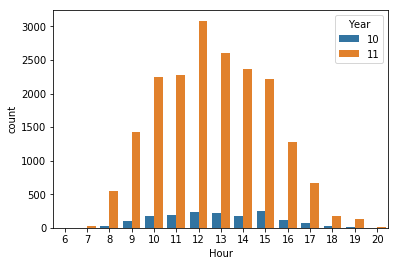

In [92]:
chart = sns.countplot(x='Hour', hue='Year', data=orderInfo)
#Đề bài khá khó hiểu. Theo ý em thì em sẽ biểu diễn tổng số lượng order theo giờ trong từng năm.

**How many orders (per month)?**

In [93]:
print('In 2010')
print(orderInfo[orderInfo['Year'] == 10]['Month'].value_counts())
print('In 2011')
print(orderInfo[orderInfo['Year'] == 11]['Month'].value_counts())
#Dữ liệu ở năm 2010 không đầy đủ nên dẫn đến sự chênh lệch lớn giữa những lần so sánh các thống số theo từng năm.

In 2010
12    1629
Name: Month, dtype: int64
In 2011
11    2884
10    2129
9     1896
5     1731
6     1576
7     1540
3     1531
8     1407
4     1319
2     1126
1     1120
12     839
Name: Month, dtype: int64


**Make a plot about number of orders per month**

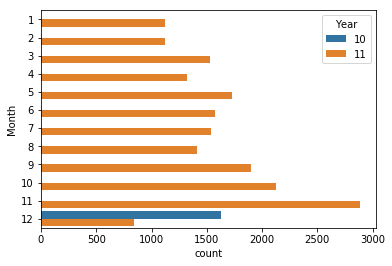

In [94]:
chart = sns.countplot(y='Month', hue='Year', data=orderInfo)
#Tương tự như trên.

**Top 10 items most sales**

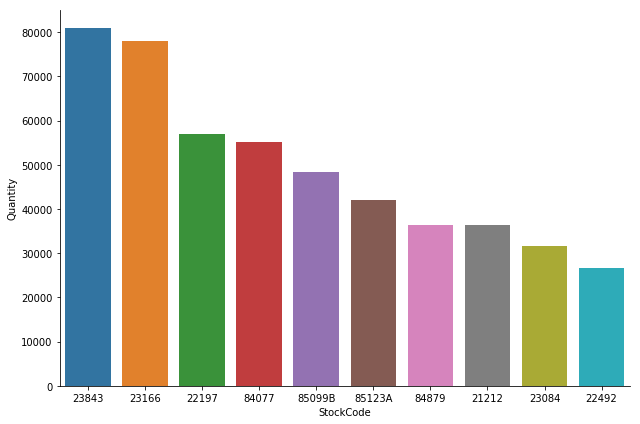

In [95]:
ot['StockCode'] = ot['StockCode'].str.upper().str.strip()
#Chuẩn hóa StockCode, loại các khoảng trắng thừa và các kí tự đều phải in hoa
top10StockCode = ot.groupby(['StockCode']).sum().reset_index().nlargest(10, 'Quantity')
#Group theo StockCode và tính tổng số lượng sản phẩm được bán theo Quantity, chọn top 10.
top10StockCode
sns.catplot(x='StockCode', y='Quantity', data=top10StockCode, kind='bar', height=6, aspect=1.5)

**Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK**

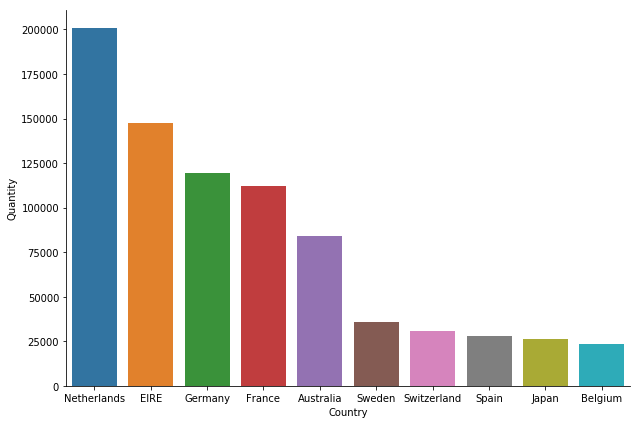

In [96]:
# Your code here
top10Country = ot[ot['Country'] != 'United Kingdom'].groupby(['Country']).sum().nlargest(10, 'Quantity').reset_index()
#Lọc các hàng không phải từ UK, group theo Country và tính tổng số lượng sản phẩm được bán theo Quantity, chọn top 10.
sns.catplot(x='Country', y='Quantity', data=top10Country, kind='bar', height=6, aspect=1.5)
# What can you tell about this?
# Nước có số lượng sản phẩm được đặt nhiều nhất là Netherlands.
# Hầu hết các nước được vào top đều là các nước châu Âu. Chỉ có Australia và Japan là nằm ngoài.
# Hết òi, em nghĩ nếu thêm cột tổng số lượng tiền đã chi của mỗi nước ra thì sẽ có cái để nói thêm. Mà thôi,... (lazy)

### You are awesome!!